In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


## SinergyData
carga de dataset

In [42]:
reseñas = pd.read_csv("../reseñas/reseñas.csv")

descripcion de datos 


In [43]:
reseñas.head(5)

,user_id,name,time,rating,text,pics,gmap_id,place,time_resp,resp
0,1.089268e+20,Christopher Thomas Constantino,2021-06-12 23:27:17.434,4,Great pet friendly place on the American River...,[{'url': ['https://lh5.googleusercontent.com/p...,0x809a55833fbe05ad:0xee6507787fb6a26c,California,2021-06-15 14:39:44.860,Thank you for the review and photos Christophe...
1,1.147835e+20,Valley Girl,2020-11-06 01:35:04.569,5,Beautiful outdoorsy getaway. Kitchenette cotta...,NaN,0x809a55833fbe05ad:0xee6507787fb6a26c,California,2021-01-18 16:55:19.328,Thank you Valley Girl !! Come back again somet...
2,1.158307e+20,John Barringer,2020-11-01 03:06:47.321,5,I was the chef at this evening's wedding. I wa...,NaN,0x809a55833fbe05ad:0xee6507787fb6a26c,California,2020-11-01 02:12:50.230,Thank you John! It means alot to us that you t...
3,1.083060e+20,Missey Iverson,2021-06-08 15:35:00.137,5,I am trying to book a small cabin. Help. 😆,NaN,0x809a55833fbe05ad:0xee6507787fb6a26c,California,2021-06-08 15:56:07.495,Well this is a first 😄 if you are in fact tryi...
4,1.165939e+20,Larry S.,2018-04-09 16:11:16.898,5,My kids and I spent part of last week in Colom...,NaN,0x809a55833fbe05ad:0xee6507787fb6a26c,California,2020-06-18 20:41:34.586,Thank you Larry! Its river time again!


In [44]:
reseñas.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'gmap_id', 'place',
       'time_resp', 'resp'],
      dtype='object')

- user_id = id del usuario que hace la reseña
- name = nombre del usuario
- time = fecha en que se realizo la reseña
- rating = calificación dada por el usuario del 1 al 5
- text = reseña del usuario
- pics = url de las fotos que acompañan a la reseña
- resp = respuesta de la reseña por parte del negocio, contiene de forma anidada una fecha y un texto
- gmap_id = id del mapa
- place = nombre de la ciudad
- time_resp = fecha de respuesta por parte del negocio

In [45]:
# informacion de las columnas 
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    6088 non-null   float64
 1   name       6088 non-null   object 
 2   time       6088 non-null   object 
 3   rating     6088 non-null   int64  
 4   text       3970 non-null   object 
 5   pics       202 non-null    object 
 6   gmap_id    6088 non-null   object 
 7   place      6088 non-null   object 
 8   time_resp  383 non-null    object 
 9   resp       383 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 475.8+ KB


Se pueden observar que en la columna de text, pics y resp hacen falta datos por lo que debemos normalizarlos 

In [46]:
#recuento de nulos
total_datos=reseñas.shape[0]
total_no_nulos_text = total_datos - reseñas["text"].isnull().sum()
total_no_nulos_pics = total_datos - reseñas["pics"].isnull().sum()
total_no_nulos_resp = total_datos - reseñas["resp"].isnull().sum()
total_no_nulos_name = total_datos - reseñas["name"].isnull().sum()
total_no_nulos_time = total_datos - reseñas["time"].isnull().sum()
total_no_nulos_rating = total_datos - reseñas["rating"].isnull().sum()
total_no_nulos_gmap_id = total_datos - reseñas["gmap_id"].isnull().sum()


In [47]:
categorias = ['text', 'pics', 'resp', 'name', 'time', 'rating','gmai_id']
valores = [total_no_nulos_text, total_no_nulos_pics, total_no_nulos_resp,total_no_nulos_name, total_no_nulos_time, total_no_nulos_rating, total_no_nulos_gmap_id]

# Colores para las barras (uno por cada barra)
colores_barras = ['#4D77FF', '#56BBF1', '#5EE6EB', 'orange', 'orange', 'orange', 'orange']

# Crear el gráfico de barras
fig = go.Figure(data=[go.Bar(x=categorias, y=valores, marker_color=colores_barras)])


# Personalizar el diseño del gráfico
fig.update_layout(title='Valores No Nulos', title_x=0.5,  
                  xaxis_title='Categorías',
                  yaxis_title='Valores')
fig.show()


In [48]:
#normalizamos datos
reseñas['text'] = reseñas['text'].fillna("")
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    6088 non-null   float64
 1   name       6088 non-null   object 
 2   time       6088 non-null   object 
 3   rating     6088 non-null   int64  
 4   text       6088 non-null   object 
 5   pics       202 non-null    object 
 6   gmap_id    6088 non-null   object 
 7   place      6088 non-null   object 
 8   time_resp  383 non-null    object 
 9   resp       383 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 475.8+ KB


In [49]:

# Convierto la columna 'time' al tipo de dato datetime para poder obtener el año
reseñas['time'] = pd.to_datetime(reseñas['time'])


# creo la columna 'time' con el año extraído de 'time'
reseñas['year_time'] = reseñas['time'].dt.year

reseñas['year_time']


0       2021
1       2020
2       2020
3       2021
4       2018
        ... 
6083    2018
6084    2017
6085    2018
6086    2018
6087    2017
Name: year_time, Length: 6088, dtype: int32

In [50]:
#reseñas por año variable time

reseñas_por_año = reseñas.groupby("year_time").count().reset_index()
reseñas_por_año[["year_time", "text", "rating"]]



,year_time,text,rating
0,2008,2,2
1,2009,1,1
2,2010,6,6
3,2011,19,19
4,2012,11,11
5,2013,36,36
6,2014,47,47
7,2015,136,136
8,2016,826,826
9,2017,1432,1432


In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=reseñas_por_año['year_time'], y=reseñas_por_año['text'],
                         mode='lines+markers',
                         line=dict(color='#4D77FF', width=2),
                         marker=dict(color='orange', size=8),
                         name='Cantidad de Comentarios'))
fig.add_trace(go.Scatter(x=reseñas_por_año['year_time'], y=reseñas_por_año['rating'],
                         mode='lines+markers',
                         line=dict(color='#56BBF1', width=2),
                         marker=dict(color='green', size=8),
                         name='Cantidad de reseñas'))
fig.update_layout(title='Cantidad de Comentarios y Reseñas por Año',
                  xaxis_title='Año', title_x=0.5, 
                  yaxis_title='Cantidad de Comentarios')
fig.show()

Basándonos en la información del gráfico anterior, podemos extraer algunas conclusiones importantes sobre la evolución de los datos a lo largo de los años 2008 al 2021. Los resultados muestran una clara tendencia de crecimiento en los valores de "text" y "rating" a medida que avanzamos en el tiempo.

En los primeros años (2008 al 2010), tanto el número de "text" como el "rating" se mantuvieron relativamente bajos y estables. Sin embargo, a partir del año 2011, se observa un incremento considerable en ambos indicadores, mostrando un crecimiento acelerado hasta el año 2018.

El año 2017 y 2018 registraron los valores más altos para "text" y "rating", lo que indica un aumento significativo en la actividad y la calificación. A partir del año 2019, se observa una disminución gradual en los valores, aunque aún se mantienen en niveles superiores a los de los primeros años del período analizado.

Este análisis sugiere que, durante estos años, hubo un aumento notable en la participación y la evaluación del contenido, lo que probablemente refleje un aumento en el interés y la interacción de los usuarios. No obstante, es importante destacar que los datos del año 2020 y 2021 parecen mostrar una disminución en la cantidad de "text" y "rating", lo cual podría estar influenciado por factores externos como la pandemia de COVID-19 y sus efectos en el comportamiento de los usuarios.

In [52]:
grouped_df = reseñas.groupby(['rating', 'place']).size().reset_index(name='count')
grouped_df

,rating,place,count
0,1,California,346
1,1,Las Vegas,26
2,1,New York,272
3,2,California,252
4,2,Las Vegas,14
5,2,New York,151
6,3,California,620
7,3,Las Vegas,44
8,3,New York,335
9,4,California,904


In [53]:

fig = go.Figure()

for rating, data in grouped_df.groupby('rating'):
    fig.add_trace(go.Bar(x=data['place'], y=data['count'], name=f'Rating {rating}'))

fig.update_layout(title='Gráfico de Reseñas por Rating y Place',title_x=0.5,
                  xaxis_title='Place',
                  yaxis_title='Cantidad de Reseñas')

fig.show()


In [54]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariahe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
reseñas['text'] = reseñas['text'].astype(str)

def preprocess_text(text):
    text = text.lower()  # Convertir todo a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Aplicar el preprocesamiento a la columna 'text'
reseñas['cleaned_text'] = reseñas['text'].apply(preprocess_text)

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

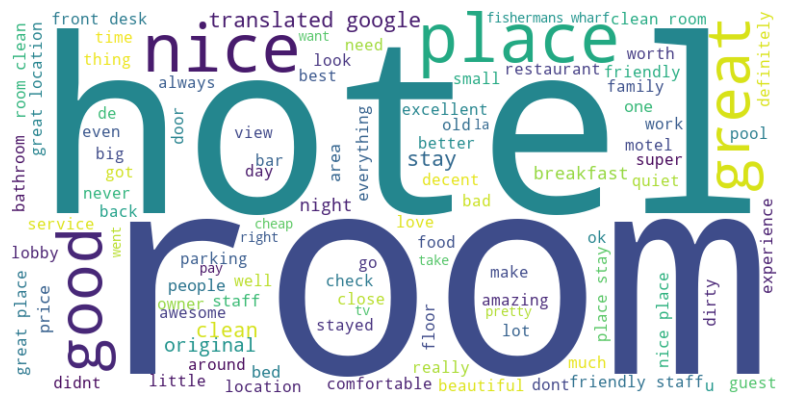

In [57]:
# Concatenar todos los comentarios en un solo string
all_comments = ' '.join(reseñas['cleaned_text'])

# Crear un objeto WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue').generate(all_comments)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()